In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

### Exercise 1

In [3]:
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

In [4]:
cprob = (np.arange(years_nb, dtype=float)+1)/(years_nb+1)
smax_speeds = np.sort(max_speeds)
qspeed = UnivariateSpline(x=cprob, y=smax_speeds)
probs = np.arange(0,1, 1e-2)

In [5]:
fifty_prob = 1. - 0.02
fifty_wind = qspeed(fifty_prob)
print("Max Estimated Wind Speed in 50 years:", fifty_wind)

Max Estimated Wind Speed in 50 years: 32.97989844019469


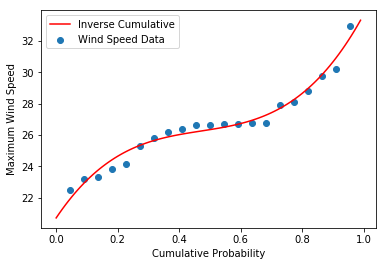

In [6]:
plt.figure()
plt.plot(probs, qspeed(probs), color='r', label='Inverse Cumulative')
plt.scatter(cprob, smax_speeds, label='Wind Speed Data')
plt.xlabel("Cumulative Probability")
plt.ylabel("Maximum Wind Speed")
plt.legend()
plt.show()

### Esercizio 2

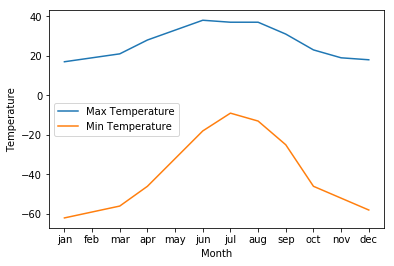

In [7]:
import scipy.optimize as opt
x = np.arange(1,13)
max_t = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
labels = ['jan','feb','mar','apr','may','jun', 'jul','aug','sep', 'oct', 'nov', 'dec']
fig, ax = plt.subplots(1,1)
ax.plot(x, max_t, label="Max Temperature")
ax.plot(x, min_t, label="Min Temperature")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [8]:
def gaussianfunc(x, a, b, c,d):
    return a*np.exp(-(x-b)**2/c)+d

In [9]:
minparams,_ = opt.curve_fit(gaussianfunc, x, min_t+100)
maxparams,_ = opt.curve_fit(gaussianfunc, x, max_t)
print(minparams)
print(maxparams)

[52.64929219  7.16452596  7.80836295 38.67906324]
[23.09208058  6.73581603 10.52885606 15.77932952]


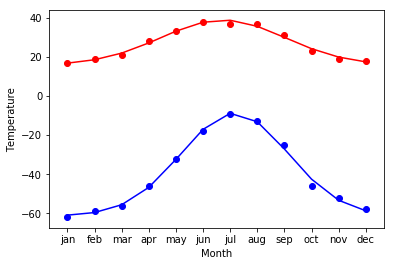

In [10]:
fig, ax = plt.subplots(1,1)
ax.plot(x,gaussianfunc(x, maxparams[0],maxparams[1], maxparams[2],maxparams[3]), color='r')
ax.scatter(x,max_t,color='r')
ax.scatter(x,min_t,color='b')
ax.plot(x,gaussianfunc(x, minparams[0],minparams[1], minparams[2], minparams[3])-100,color='b')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlabel("Month")
plt.ylabel("Temperature")
#plt.legend()
plt.show()

### Esercizio 3

In [11]:
def myfunc(x,y):
    return (4-2.1*(x**2)+(1/3)*(x**4))*(x**2)+x*y+(y**2)*4*(y**2-1)
def myfunc_np(xvec):
    return (4-2.1*(xvec[0]**2)+(1/3)*(xvec[0]**4))*(xvec[0]**2)+xvec[0]*xvec[1]+(xvec[1]**2)*4*(xvec[1]**2-1)

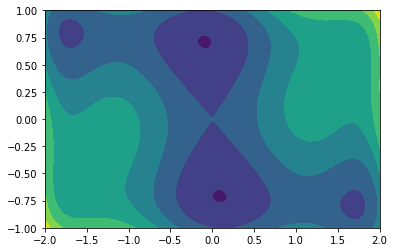

In [12]:
import scipy.optimize as opt
x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)
xg,yg = np.meshgrid(x,y)
z = myfunc(xg,yg)
plt.contourf(x,y,z)
plt.show()

In [13]:
#random initial guess
opt.minimize(myfunc_np,x0=np.random.rand(2))
#every launch -> same value -> good

      fun: -1.031628453489174
 hess_inv: array([[ 0.13086113, -0.00969153],
       [-0.00969153,  0.06359757]])
      jac: array([ 1.50501728e-06, -3.99351120e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([-0.0898418 ,  0.71265614])

In [14]:
#(0,0) initial guess
opt.minimize(myfunc_np,x0=np.zeros(2))
#no real global minima sincethe procedure gets stuck at (0,0) -> notice the low 4 nfev (number of function evaluations)

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

### Esercizio 4

In [17]:
import pandas as pd
from scipy.fftpack import fft, ifft,fft2,ifft2
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2019-06-08 17:30:59--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2019-06-08 17:30:59--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc4675bc892677d7e5da397a59fc.dl.dropboxusercontent.com/cd/0/inline/AidgOBj8umzv2AZaYtXgSPb21u4gP3K4VJ7MBYRAsiyDOj4hud4Pp-dmcqCoSfebwL7Lqd-8FuqE9h0SahsvMnDGMqRVu5vtjuinL9JxT2dMvw/file# [segue]
--2019-06-08 17:31:00--  https://uc4675bc892677d7e5da397a59fc.dl.dropboxusercontent.com/cd/0/inline/AidgOBj8umzv2AZaYtXgSPb21u4gP3K4VJ7MBYRAsiyDOj4hud4Pp-dmcqCoSfebwL7Lqd-8FuqE9h0SahsvMnDGMqRVu5vtj

In [18]:
df = pd.read_csv('populations.txt',delimiter='\t')
df.describe()

,# year,hare,lynx,carrot
count,21.000000,21.000000,21.000000,21.000000
mean,1910.000000,34080.952381,20166.666667,42400.000000
std,6.204837,21413.981859,16655.999920,3404.555771
min,1900.000000,7600.000000,4000.000000,36700.000000
25%,1905.000000,19500.000000,8600.000000,39800.000000
50%,1910.000000,25400.000000,12300.000000,41800.000000
75%,1915.000000,47200.000000,29700.000000,44500.000000
max,1920.000000,77400.000000,59400.000000,48300.000000


In [19]:
hare_ft = fft(df['hare'])
lynx_ft = fft(df['lynx'])
carrot_ft = fft(df['carrot'])

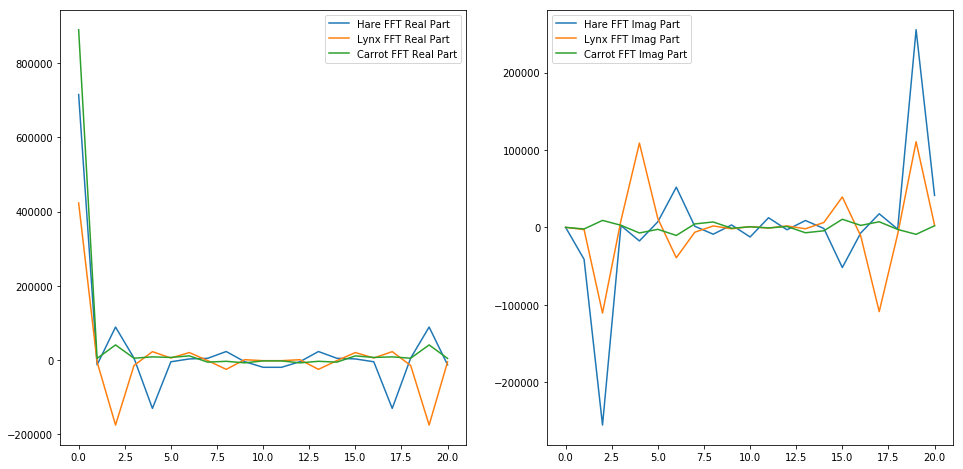

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.plot(hare_ft.real, label='Hare FFT Real Part')
ax1.plot(lynx_ft.real,label='Lynx FFT Real Part')
ax1.plot(carrot_ft.real, label='Carrot FFT Real Part')
ax2.plot(hare_ft.imag, label='Hare FFT Imag Part')
ax2.plot(lynx_ft.imag,label='Lynx FFT Imag Part')
ax2.plot(carrot_ft.imag, label='Carrot FFT Imag Part')
ax1.legend()
ax2.legend()
plt.show()

In [21]:
import pylab as pyl

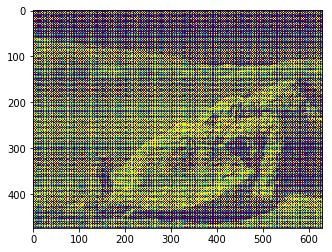

In [23]:
img = pyl.imread('moonlanding.png')
pyl.imshow(img)
plt.show()

We have problems for showing both high and low frequencies since there is an huge gap between the low componenst of the image and the hight of the noise

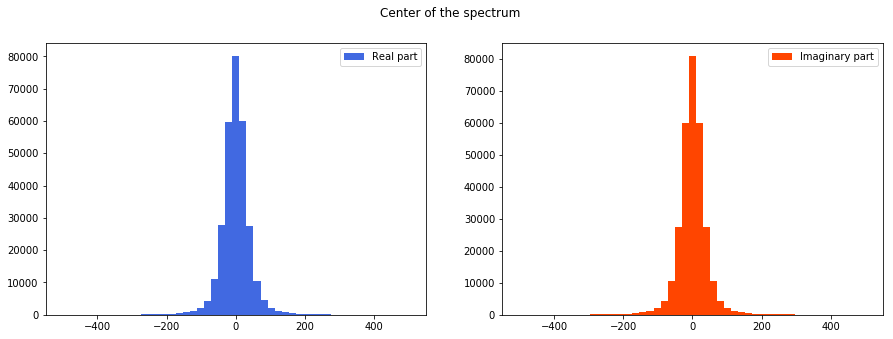

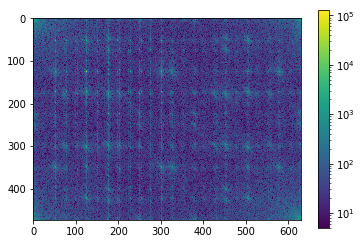

In [96]:
from matplotlib.colors import LogNorm
imgfft = fft2(img)
cut = 500
bins = np.linspace(-cut, cut)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Center of the spectrum')
ax1.hist(imgfft.real.ravel(), bins, label='Real part', color='royalblue')
ax2.hist(imgfft.imag.ravel(), bins, label='Imaginary part', color='orangered')
ax1.legend()
ax2.legend()
plt.show()
plt.figure()
plt.imshow(np.abs(imgfft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.show()

In [99]:
rows,cols = imgfft.shape
scale=0.2 #how  the filter is big
imgfft[int(rows*scale):int(rows*(1-scale)),:]=0
imgfft[:,int(cols*scale):int(cols*(1-scale))]=0

In [100]:
iimg = ifft2(imgfft)

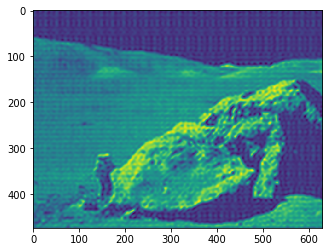

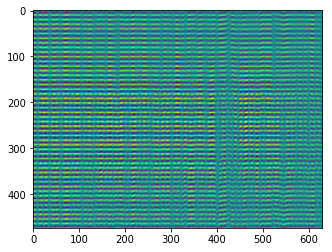

In [101]:
pyl.imshow(iimg.real)
plt.show()
pyl.imshow(iimg.imag)
plt.show()